# AMAZON SALES DATASET PRACTICE

# OBJECTIVE:
---

- The objective of this analysis is to understand how pricing, discounts, and product positioning influence customer engagement, measured using rating counts.

- The analysis focuses on identifying whether higher discounts actually translate into higher engagement and which price segments offer the best value.

### Environment Setup

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

print("Environment setup done")

Environment setup done


In [207]:
amazon_sales = pd.read_csv("/Users/pranab/Downloads/Amazon.csv")

print("File Loaded Successfully")

File Loaded Successfully


### Data Cleaning Process

In [208]:
amazon_data.shape
amazon_data.info()
amazon_data.describe()

## Data Loading Initial Validation

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 33 to 1462
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           223 non-null    object 
 1   product_name         223 non-null    object 
 2   category             223 non-null    object 
 3   discounted_price     223 non-null    float64
 4   actual_price         223 non-null    float64
 5   discount_percentage  223 non-null    int64  
 6   rating               223 non-null    object 
 7   rating_count         223 non-null    float64
 8   about_product        223 non-null    object 
 9   user_id              223 non-null    object 
 10  user_name            223 non-null    object 
 11  review_id            223 non-null    object 
 12  review_title         223 non-null    object 
 13  review_content       223 non-null    object 
 14  img_link             223 non-null    object 
 15  product_link         223 non-null    object

,discounted_price,actual_price,discount_percentage,rating_count,discount_amount,discount_ratio,rating_count_log,value_score
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,1800.481704,3457.645740,49.641256,337.766816,1657.164036,0.496452,5.360269,0.014128
std,4272.126363,7959.928847,18.911041,254.756657,3881.498466,0.189101,1.199073,0.013588
min,79.000000,79.000000,0.000000,2.000000,0.000000,0.000000,1.098612,0.000149
25%,228.500000,599.000000,39.000000,127.000000,300.000000,0.391663,4.852030,0.002812
50%,429.000000,999.000000,52.000000,296.000000,650.000000,0.515917,5.693732,0.010744
75%,1799.000000,3292.500000,61.000000,518.000000,1450.000000,0.611201,6.251857,0.022364
max,37247.000000,65000.000000,90.000000,992.000000,35010.000000,0.900901,6.900731,0.064531


In [209]:
amazon_data = amazon_data.drop_duplicates()
amazon_data = amazon_data.dropna()

print("Duplicates & Null Values Removed Succesfully")

Duplicates & Null Values Removed Succesfully


### Price, Discount & Rating Normalization

- Since, the values are showing with ₹ symbols

- hence it can create issue in the future 
 
- so we are removing and correcting them in the initial stage


In [210]:
amazon_data[col] = pd.to_numeric(amazon_data[col], errors='coerce')

print("Corrected the values")

Corrected the values


In [211]:
amazon_data = amazon_data[
    amazon_data['discounted_price'] <= amazon_data['actual_price']
]

print("Invalid business cases were explicitly checked and removed")

Invalid business cases were explicitly checked and removed


### DEEPER ANALYSYS

In [238]:
price_cols = ['actual_price', 'discounted_price']

for col in price_cols:
    amazon_data[col] = (
        amazon_data[col]
        .astype(str)
        .str.replace(r'[₹,]', '', regex=True)
        .str.strip()
    )


In [239]:
for col in price_cols:
    amazon_data[col] = pd.to_numeric(
        amazon_data[col],
        errors='coerce'
    )


In [240]:
amazon_data = amazon_data.dropna(subset=price_cols)


In [233]:
amazon_data = amazon_data.dropna(subset=numeric_cols)

In [241]:
amazon_data = amazon_data[
    (amazon_data['actual_price'] > 0) &
    (amazon_data['discounted_price'] > 0) &
    (amazon_data['discounted_price'] <= amazon_data['actual_price'])
]


In [221]:
# Discounted Amount

amazon_data['discount_amount'] = (
    amazon_data['actual_price'] - amazon_data['discounted_price']
)


# Discounted Ratio

amazon_data['discount_ratio'] = (
    amazon_data['discount_amount'] / amazon_data['actual_price']
)


# Log-transformed Engagement

amazon_data['rating_count_log'] = np.log1p(amazon_data['rating_count'])

# Value Score

amazon_data['value_score'] = (
    amazon_data['rating_count_log'] / amazon_data['discounted_price']
)


In [242]:
amazon_data[price_cols].dtypes


actual_price        float64
discounted_price    float64
dtype: object

### Exploratory Analysis

In [278]:
final_df = amazon_data.copy()

import os
os.makedirs("images", exist_ok=True)

In [246]:
final_df.shape
final_df.isna().sum().sum()
final_df.dtypes


product_id               object
product_name             object
category                 object
discounted_price        float64
actual_price            float64
discount_percentage      object
rating                   object
rating_count             object
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
discount_amount         float64
discount_ratio          float64
rating_count_log        float64
value_score             float64
price_band             category
dtype: object

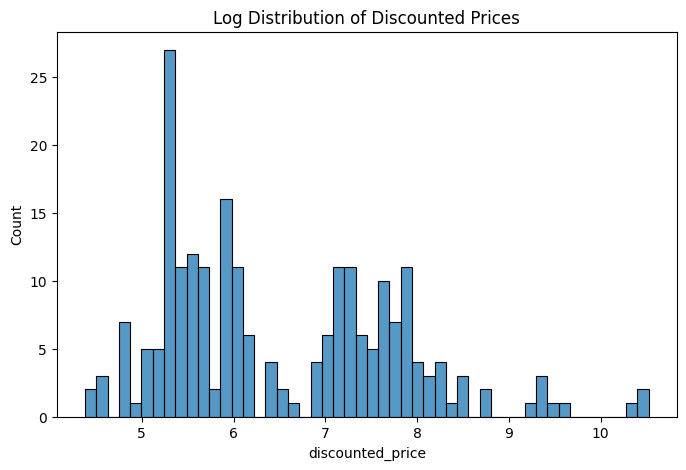

In [279]:
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(final_df['discounted_price']), bins=50)
plt.title("Log Distribution of Discounted Prices")

plt.savefig("images/01_log_discounted_price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


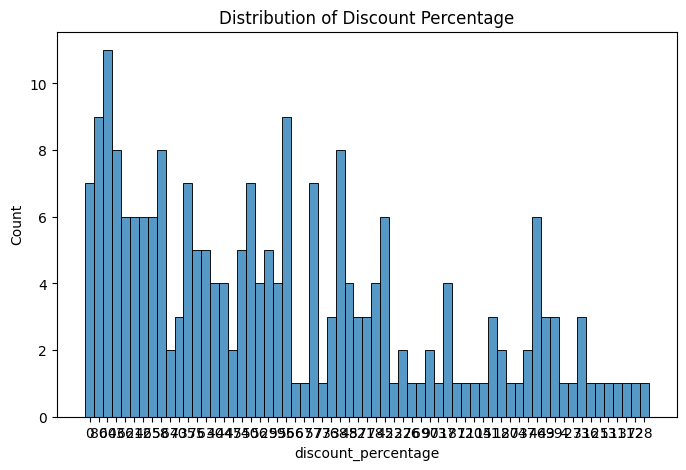

In [280]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['discount_percentage'], bins=40)
plt.title("Distribution of Discount Percentage")

plt.savefig("images/02_discount_percentage_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


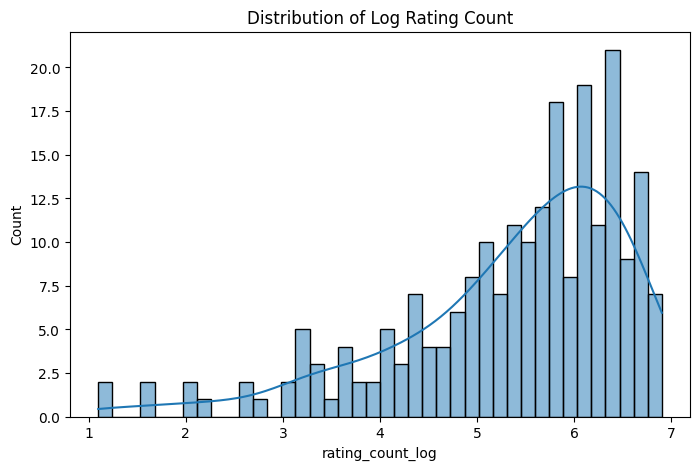

In [281]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['rating_count_log'], bins=40, kde=True)
plt.title("Distribution of Log Rating Count")

plt.savefig("images/03_log_rating_count_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


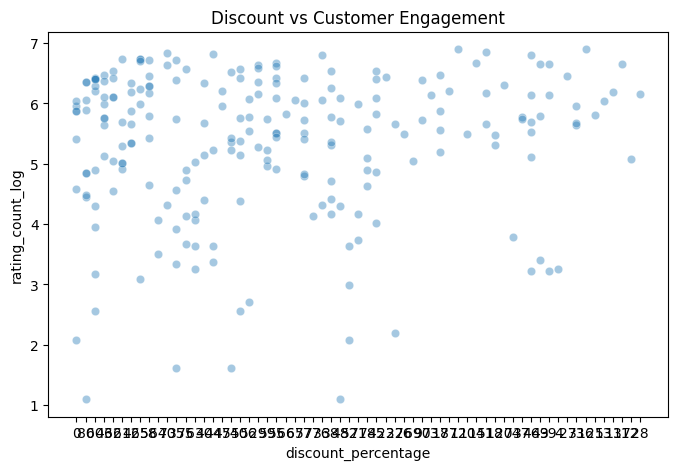

In [283]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='discount_percentage',
    y='rating_count_log',
    data=final_df,
    alpha=0.4
)
plt.title("Discount vs Customer Engagement")

plt.savefig("images/04_discount_vs_engagement.png", dpi=300, bbox_inches="tight")
plt.show()


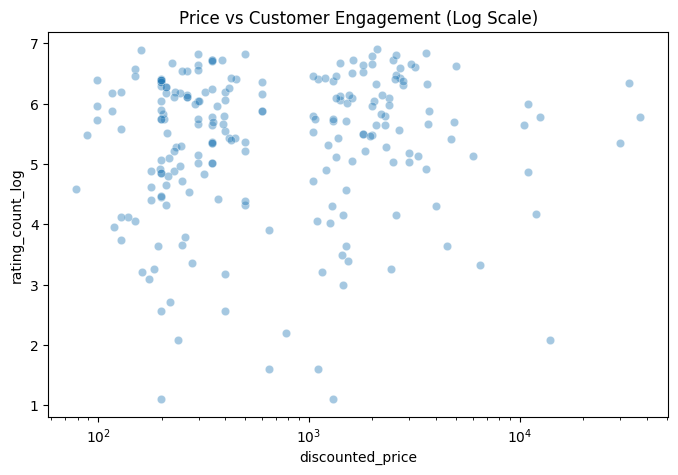

In [284]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='discounted_price',
    y='rating_count_log',
    data=final_df,
    alpha=0.4
)
plt.xscale('log')
plt.title("Price vs Customer Engagement (Log Scale)")

plt.savefig("images/05_price_vs_engagement_log.png", dpi=300, bbox_inches="tight")
plt.show()


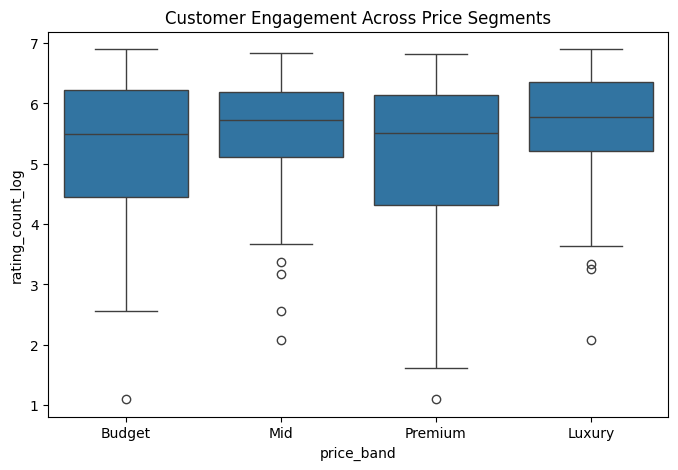

In [285]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='price_band',
    y='rating_count_log',
    data=final_df
)
plt.title("Customer Engagement Across Price Segments")

plt.savefig("images/06_engagement_by_price_band.png", dpi=300, bbox_inches="tight")
plt.show()


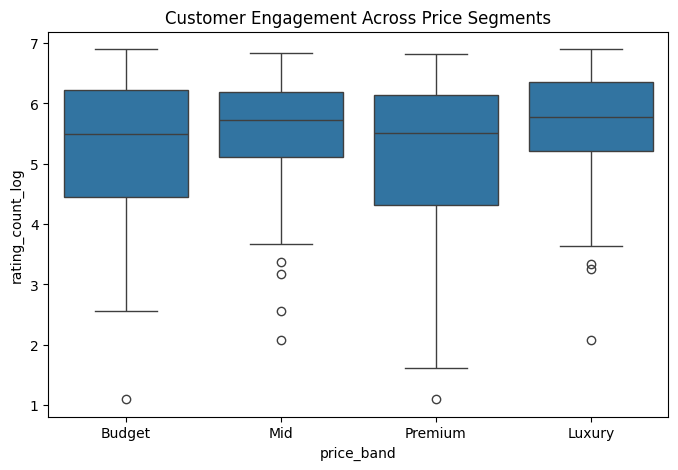

In [286]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='price_band',
    y='rating_count_log',
    data=final_df
)
plt.title("Customer Engagement Across Price Segments")

plt.savefig("images/06_engagement_by_price_band.png", dpi=300, bbox_inches="tight")
plt.show()


In [282]:
final_df.groupby(
    'price_band',
    observed=True
)['value_score'].mean().sort_values(ascending=False)

# Value Efficiency

price_band
Budget     0.031434
Mid        0.017792
Premium    0.005215
Luxury     0.001851
Name: value_score, dtype: float64

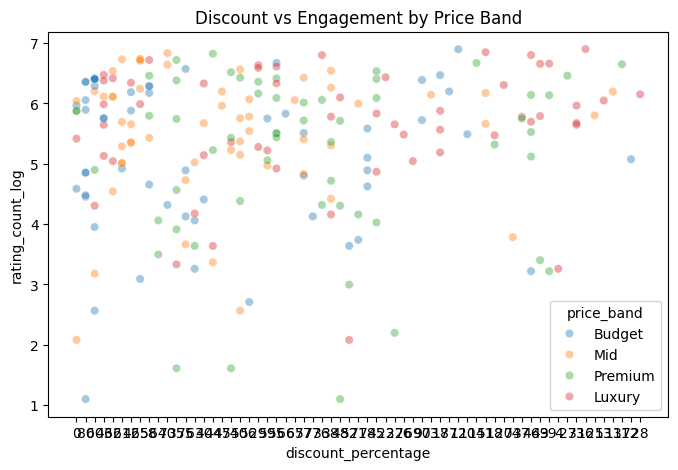

In [287]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='discount_percentage',
    y='rating_count_log',
    hue='price_band',
    data=final_df,
    alpha=0.4
)
plt.title("Discount vs Engagement by Price Band")

plt.savefig("images/07_discount_vs_engagement_by_price_band.png", dpi=300, bbox_inches="tight")
plt.show()


### Insights from Value Score Distribution by Price Band

- Budget products deliver the highest engagement per rupee, making them the most efficient category in terms of customer attention. 
- As price increases, engagement efficiency declines sharply, with luxury products providing the lowest value score despite higher pricing.

In [266]:
final_df['discount_percentage'] = pd.to_numeric(
    final_df['discount_percentage'],
    errors='coerce'
)

final_df['rating_count_log'] = pd.to_numeric(
    final_df['rating_count_log'],
    errors='coerce'
)


In [267]:
final_df[
    final_df['value_score'] >
    final_df['value_score'].quantile(0.99)
]
final_df[
    (final_df['discount_percentage'] > 60) &
    (final_df['rating_count_log'] < final_df['rating_count_log'].median())
]


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,discount_amount,discount_ratio,rating_count_log,value_score,price_band
70,B0B86CDHL1,oraimo 65W Type C to C Fast Charging Cable USB...,Computers&Accessories|Accessories&Peripherals|...,349.00,899.0,61,4.5,149.0,🥇【Kindly NOTE before you purchase】:This is a U...,"AEOIHOJD3O5MYSVWZOBDUJGYWZGQ,AF6LAYTAGSTBKL2QU...",...,"RDFETF8YFDP96,R3604ERFM30Q4D,R1CB3GDRVBHAIG,R2...",It worked well for some days later it is not w...,It worked well for some days later it is not w...,https://m.media-amazon.com/images/I/41gztmbiIg...,https://www.amazon.in/oraimo-Charging-Syncing-...,550.00,0.611791,5.010635,0.014357,Mid
79,B0BCZCQTJX,Firestick Remote,"Electronics|HomeTheater,TV&Video|Accessories|R...",1434.00,3999.0,64,4.0,32.0,"Compatible For Amazon Fire TV Stick (3rd Gen, ...","AEC5PUIW4OSIDDQED7WLXG2S7TOQ,AGVXOHPJT64ZRYKHI...",...,"R35LMI5GBW0RX3,R35IGWMP7EV49V,R3KQ92E1PGHL45,R...","Good Product,Good product for my fire Tv,Over-...",Works well on my 4K Amazone fire TV stick as w...,https://m.media-amazon.com/images/I/31C4z2M8Ti...,https://www.amazon.in/Basesailor-2nd-generatio...,2565.00,0.641410,3.496508,0.002438,Premium
88,B0BMXMLSMM,Lapster 65W compatible for OnePlus Dash Warp C...,Computers&Accessories|Accessories&Peripherals|...,199.00,999.0,80,4.5,127.0,-1 meter type c to c cable fast charging cable...,"AHFENRYJG4LPXDTUGEMG335VICSQ,AGSV37DJ5QTUYOXFJ...",...,"R14ZOPYFHOYYRQ,R1GQH74NUCJZZ7,R1BNWIYBRSI1Z6,R...","Super charger in lapster,Best among the rest,C...","Best quality,The product looks original-like a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Lapster-compatible-OnePl...,800.00,0.800801,4.852030,0.024382,Budget
119,B0B21C4BMX,Portronics Konnect Spydr 31 3-in-1 Multi Funct...,Computers&Accessories|Accessories&Peripherals|...,228.00,899.0,75,3.8,132.0,3.0A Output|PVC + Nylon Braided|Tangle Resista...,"AH4LJDHSBLPNJYLQGQ53EQ6DBVZA,AF4BWMWZI7TTQY2YT...",...,"R15R4BV0MI9SH1,R3L67FMAFHYG6H,R1GR1N3BCB3VVZ,R...",its not for fast charging as per my use and th...,i like the made of the product but it doesn't ...,https://m.media-amazon.com/images/I/41LCWn4aUH...,https://www.amazon.in/Portronics-Konnect-Funct...,671.00,0.746385,4.890349,0.021449,Budget
121,B0BHZCNC4P,Remote Control Compatible for Amazon Fire Tv S...,"Electronics|HomeTheater,TV&Video|Accessories|R...",1499.00,3999.0,63,3.7,37.0,"Compatible with Fire TV Stick Lite, Compatible...","AHY3QEA3CVS57POB64VVMQSPHHHA,AG633F2HW3BKLPJU3...",...,"R2RC9IQ0X5NHFU,ROE0YIUOFNATH,R1UUDX7FZOB74Y,R3...",Some buttons not working in first week of purc...,Some buttons not working in first week of purc...,https://m.media-amazon.com/images/I/31-J+oOnb8...,https://www.amazon.in/Remote-Control-Compatibl...,2500.00,0.625156,3.637586,0.002427,Premium
163,B0B3RHX6B6,Ambrane BCL-15 Lightning Cable for Smartphone ...,Computers&Accessories|Accessories&Peripherals|...,149.00,399.0,63,3.9,57.0,Upto 15W Fast Charging - Supports upto 15W fas...,"AFYQPTD6YGHPLNTGAOUBK6JTRVTA,AF7NWNWMLKRURHMLH...",...,"R1YMUWEBTRFUJL,R33UQYGSTZZE1L,ROX9I533DCL1L,R2...","Quality is good,Very sturdy,Very Good Item for...","Good one….,Very good sturdy,I am using this in...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-BCL-15-Lightning...,250.00,0.626566,4.060443,0.027251,Budget
195,B0B65MJ45G,Zebronics CU3100V Fast charging Type C cable w...,Computers&Accessories|Accessories&Peripherals|...,139.00,549.0,75,3.9,61.0,Fast charging support for various smart phones...,"AFQGGBH7UOPRRK6A4FS6UAHBBR6Q,AHUVPTZIP7GEDM62E...",...,"R2NO4JULWOQQ5N,R1RJ8AHYBK38PD,R3PU1G9HCGIUHP,R...","Terrible,Charging status,Good quality,good cha...","After 1-2 months , it has become worse and my ...",https://m.media-amazon.com/images/I/31PBfa92GV...,https://www.amazon.in/Zebronics-CU3100V-chargi...,410.00,0.7468

In [268]:
final_df.groupby(
    'price_band',
    observed=True
).agg(
    avg_discount=('discount_percentage', 'mean'),
    avg_engagement=('rating_count_log', 'mean'),
    avg_value=('value_score', 'mean'),
    product_count=('rating_count_log', 'count')
).round(2)


,avg_discount,avg_engagement,avg_value,product_count
price_band,,,,
Budget,60.98,5.15,0.03,56
Mid,52.93,5.52,0.02,56
Premium,43.61,5.14,0.01,56
Luxury,40.89,5.63,0.00,55


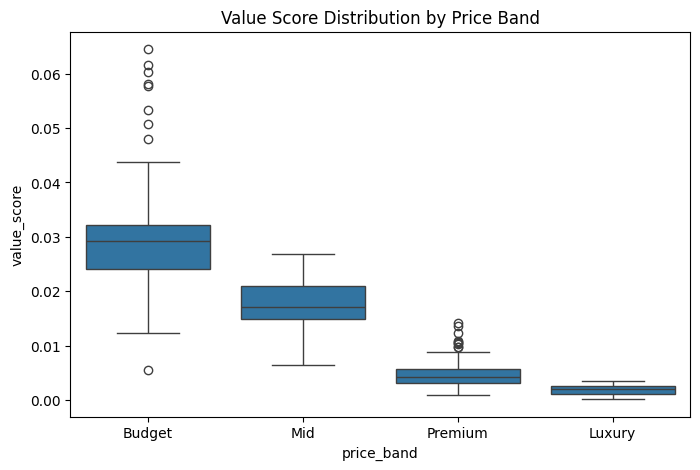

In [288]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='price_band',
    y='value_score',
    data=final_df
)
plt.title("Value Score Distribution by Price Band")

plt.savefig("images/08_value_score_by_price_band.png", dpi=300, bbox_inches="tight")
plt.show()


In [276]:
final_df.groupby(
    'price_band',
    observed=True
)['value_score'].mean().sort_values(ascending=False)


price_band
Budget     0.031434
Mid        0.017792
Premium    0.005215
Luxury     0.001851
Name: value_score, dtype: float64

# CONCLUSION

- The key takeaway is that pricing strategy should focus on value alignment rather than extreme discounting, 
especially in mid-price segments where engagement is most consistent.